## Data Mining Term Project - UCI Poker Hand Dataset

In [18]:
# import all necessary libraries here
import numpy as np
import pandas as pd
import sys

from matplotlib import pyplot as plt
from scipy import stats

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# print version for Python and major libraries
print(f'Python version: {sys.version}')
print(f'numpy version: {np.__version__}')
print(f'pandas version: {pd.__version__}')

Python version: 3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]
numpy version: 1.24.3
pandas version: 1.5.3


In [7]:
poker_training_df = pd.read_csv('poker+hand/poker-hand-training-true.data', 
                      names = ['Suit_Card_1', 'Rank_Card_1', 'Suit_Card_2', 'Rank_Card_2', 'Suit_Card_3', 'Rank_Card_3', 
                               'Suit_Card_4', 'Rank_Card_4', 'Suit_Card_5', 'Rank_Card_5', 'class'])
poker_test_df = pd.read_csv('poker+hand/poker-hand-testing.data', 
                      names = ['Suit_Card_1', 'Rank_Card_1', 'Suit_Card_2', 'Rank_Card_2', 'Suit_Card_3', 'Rank_Card_3', 
                               'Suit_Card_4', 'Rank_Card_4', 'Suit_Card_5', 'Rank_Card_5', 'class'])

frames = [poker_training_df, poker_test_df]

# concatenate the originally split test and train dataframes
poker_df = pd.concat(frames)

In [3]:
poker_df.head()

,Suit_Card_1,Rank_Card_1,Suit_Card_2,Rank_Card_2,Suit_Card_3,Rank_Card_3,Suit_Card_4,Rank_Card_4,Suit_Card_5,Rank_Card_5,class
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9


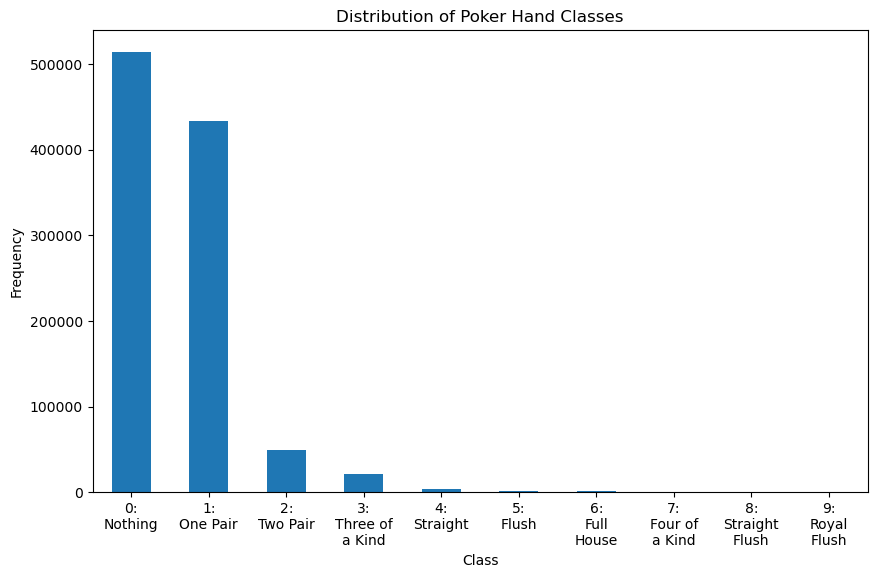

In [4]:
# Finding the distribution of hand classes
hand_class_distribution = poker_df['class'].value_counts()
# Sorting the distribution by index (class number) for better interpretation
hand_class_distribution_sorted = hand_class_distribution.sort_index()

# Class distribution plot
plt.figure(figsize=(10, 6))
hand_class_distribution_sorted.plot(kind='bar')
plt.title('Distribution of Poker Hand Classes')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], labels=['0:\nNothing', '1:\nOne Pair', '2:\nTwo Pair', '3:\nThree of\na Kind', 
                                                         '4:\nStraight', '5:\nFlush', '6:\nFull\nHouse', '7:\nFour of\na Kind', 
                                                         '8:\nStraight\nFlush', '9:\nRoyal\nFlush'], rotation=0) # Labeling x-axis

plt.show()

There is no missing data in the dataset.

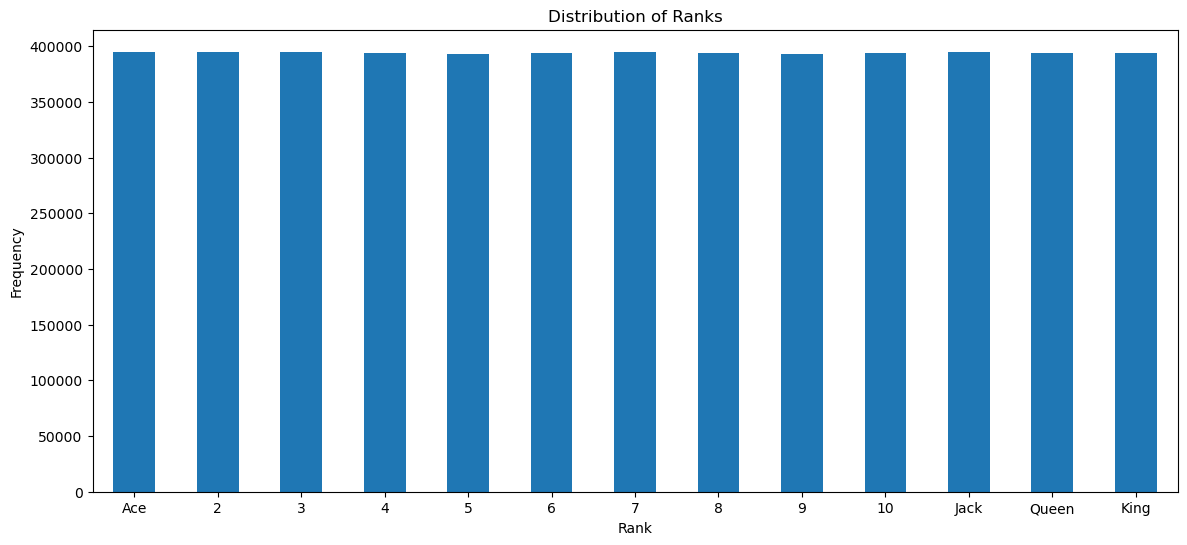

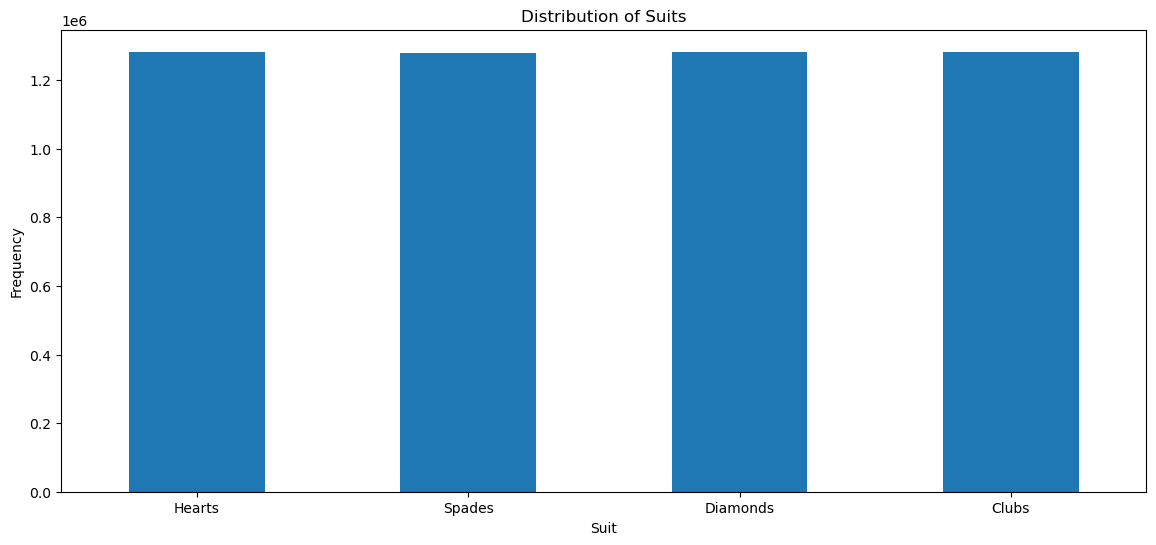

In [6]:
# Distribution of Ranks
rank_columns = ['Rank_Card_1', 'Rank_Card_2', 'Rank_Card_3', 'Rank_Card_4', 'Rank_Card_5']
rank_distribution = poker_df[rank_columns].apply(pd.Series.value_counts).sum(axis=1).sort_index()
# print(rank_distribution)
plt.figure(figsize=(14, 6))
rank_distribution.plot(kind='bar')
plt.title('Distribution of Ranks')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], labels=['Ace', '2', '3', '4', '5', '6', '7', '8', '9', '10','Jack', 'Queen', 'King'], rotation=0)
plt.show()

# Distribution of Suits
suit_columns = ['Suit_Card_1', 'Suit_Card_2', 'Suit_Card_3', 'Suit_Card_4', 'Suit_Card_5']
suit_distribution = poker_df[suit_columns].apply(pd.Series.value_counts).sum(axis=1).sort_index()
# print(suit_distribution)
plt.figure(figsize=(14, 6))
suit_distribution.plot(kind='bar')
plt.title('Distribution of Suits')
plt.xlabel('Suit')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Hearts', 'Spades', 'Diamonds', 'Clubs'], rotation=0)
plt.show()

The distributions of the suit and rank attributes show virtually no outliers on this end, which makes sense because the dataset should be based on a fair deck of cards in which any one card of a given rank and suit has an equal probability. 

In [7]:
# Finding mean and median of each column
mean_values = poker_df.drop(columns='class').mean()
median_values = poker_df.drop(columns='class').median()

print("Mean values:")
for index, value in mean_values.items():
    print(index, ": ", value)

print("\nMedian values:")
for index, value in median_values.items():
    print(index, ": ", value)

def compute_mad(df):
    mean = df.mean()
    mad = (df - mean).abs().mean()
    return mad

poker_df_MAD = compute_mad(poker_df.drop(columns='class'))
poker_df_SD = poker_df.drop(columns='class').std()
q1 = poker_df.drop(columns='class').quantile(0.25)
q3 = poker_df.drop(columns='class').quantile(0.75)
poker_df_IQR = q3 - q1
print("\nMean absolute deviation values:")
for index, value in poker_df_MAD.items():
    print(index, ": ", value)
print("\nStandard deviation values:")
for index, value in poker_df_SD.items():
    print(index, ": ", value)
print("\nInterquartile range values:")
for index, value in poker_df_IQR.items():
    print(index, ": ", value)

Mean values:
Suit_Card_1 :  2.500694627369489
Rank_Card_1 :  6.997861484278202
Suit_Card_2 :  2.4998409771611985
Rank_Card_2 :  7.006294572735876
Suit_Card_3 :  2.5010995014682784
Rank_Card_3 :  6.99924586101599
Suit_Card_4 :  2.5002838996692716
Rank_Card_4 :  7.000838040604482
Suit_Card_5 :  2.4993990302533633
Rank_Card_5 :  6.98882840167413

Median values:
Suit_Card_1 :  3.0
Rank_Card_1 :  7.0
Suit_Card_2 :  2.0
Rank_Card_2 :  7.0
Suit_Card_3 :  3.0
Rank_Card_3 :  7.0
Suit_Card_4 :  3.0
Rank_Card_4 :  7.0
Suit_Card_5 :  2.0
Rank_Card_5 :  7.0

Mean absolute deviation values:
Suit_Card_1 :  0.9996663417508891
Rank_Card_1 :  3.2330846513849734
Suit_Card_2 :  1.0006838873891635
Rank_Card_2 :  3.233318190617736
Suit_Card_3 :  1.0003463005475826
Rank_Card_3 :  3.23030501506452
Suit_Card_4 :  0.9990837867388116
Rank_Card_4 :  3.230008756600584
Suit_Card_5 :  1.0010155576337578
Rank_Card_5 :  3.2305892713469393

Standard deviation values:
Suit_Card_1 :  1.1177367207838917
Rank_Card_1 :  3.7

In [8]:
# Extract the numerical columns into a numpy array
X_poker = poker_df.iloc[:, 0:10].to_numpy()

# Calculate and print the variance of each column
variances = np.var(X_poker, axis=0, ddof=1)
print("Variances of each column:", variances)

Variances of each column: [ 1.24933538 14.01401286  1.25136899 14.01794266  1.25069659 14.00229697
  1.24816896 13.99824614  1.25203206 13.98711921]


Mathematically checking for outliers using the input classes leads to the same conclusion that we reached when looking at the distribution graphs. There are no outliers in the dataset, which makes sense. The value of the suits are integers between 1-4 and that of the ranks are integers from 1-13. Therefore, we do not have some data point with a suit of 12 and rank of 50, but rather the data points are close in relation to each other. 

In [9]:
# checking for outliers
def detect_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    # print('Lower bound values:')
    # print(lower_bound)
    upper_bound = Q3 + 1.5 * IQR
    # print('\nUpper bound values:')
    # print(upper_bound)
    
    return ((df < lower_bound) | (df > upper_bound)).any(axis=1)

outliers = detect_outliers(poker_df.drop(columns='class'))

print('\nOutliers at indices:')
print(outliers[outliers].index.tolist())


Outliers at indices:
[]


['Suit_Card_1' 'Rank_Card_1' 'Suit_Card_2' 'Rank_Card_2' 'Suit_Card_3'
 'Rank_Card_3' 'Suit_Card_4' 'Rank_Card_4' 'Suit_Card_5' 'Rank_Card_5']


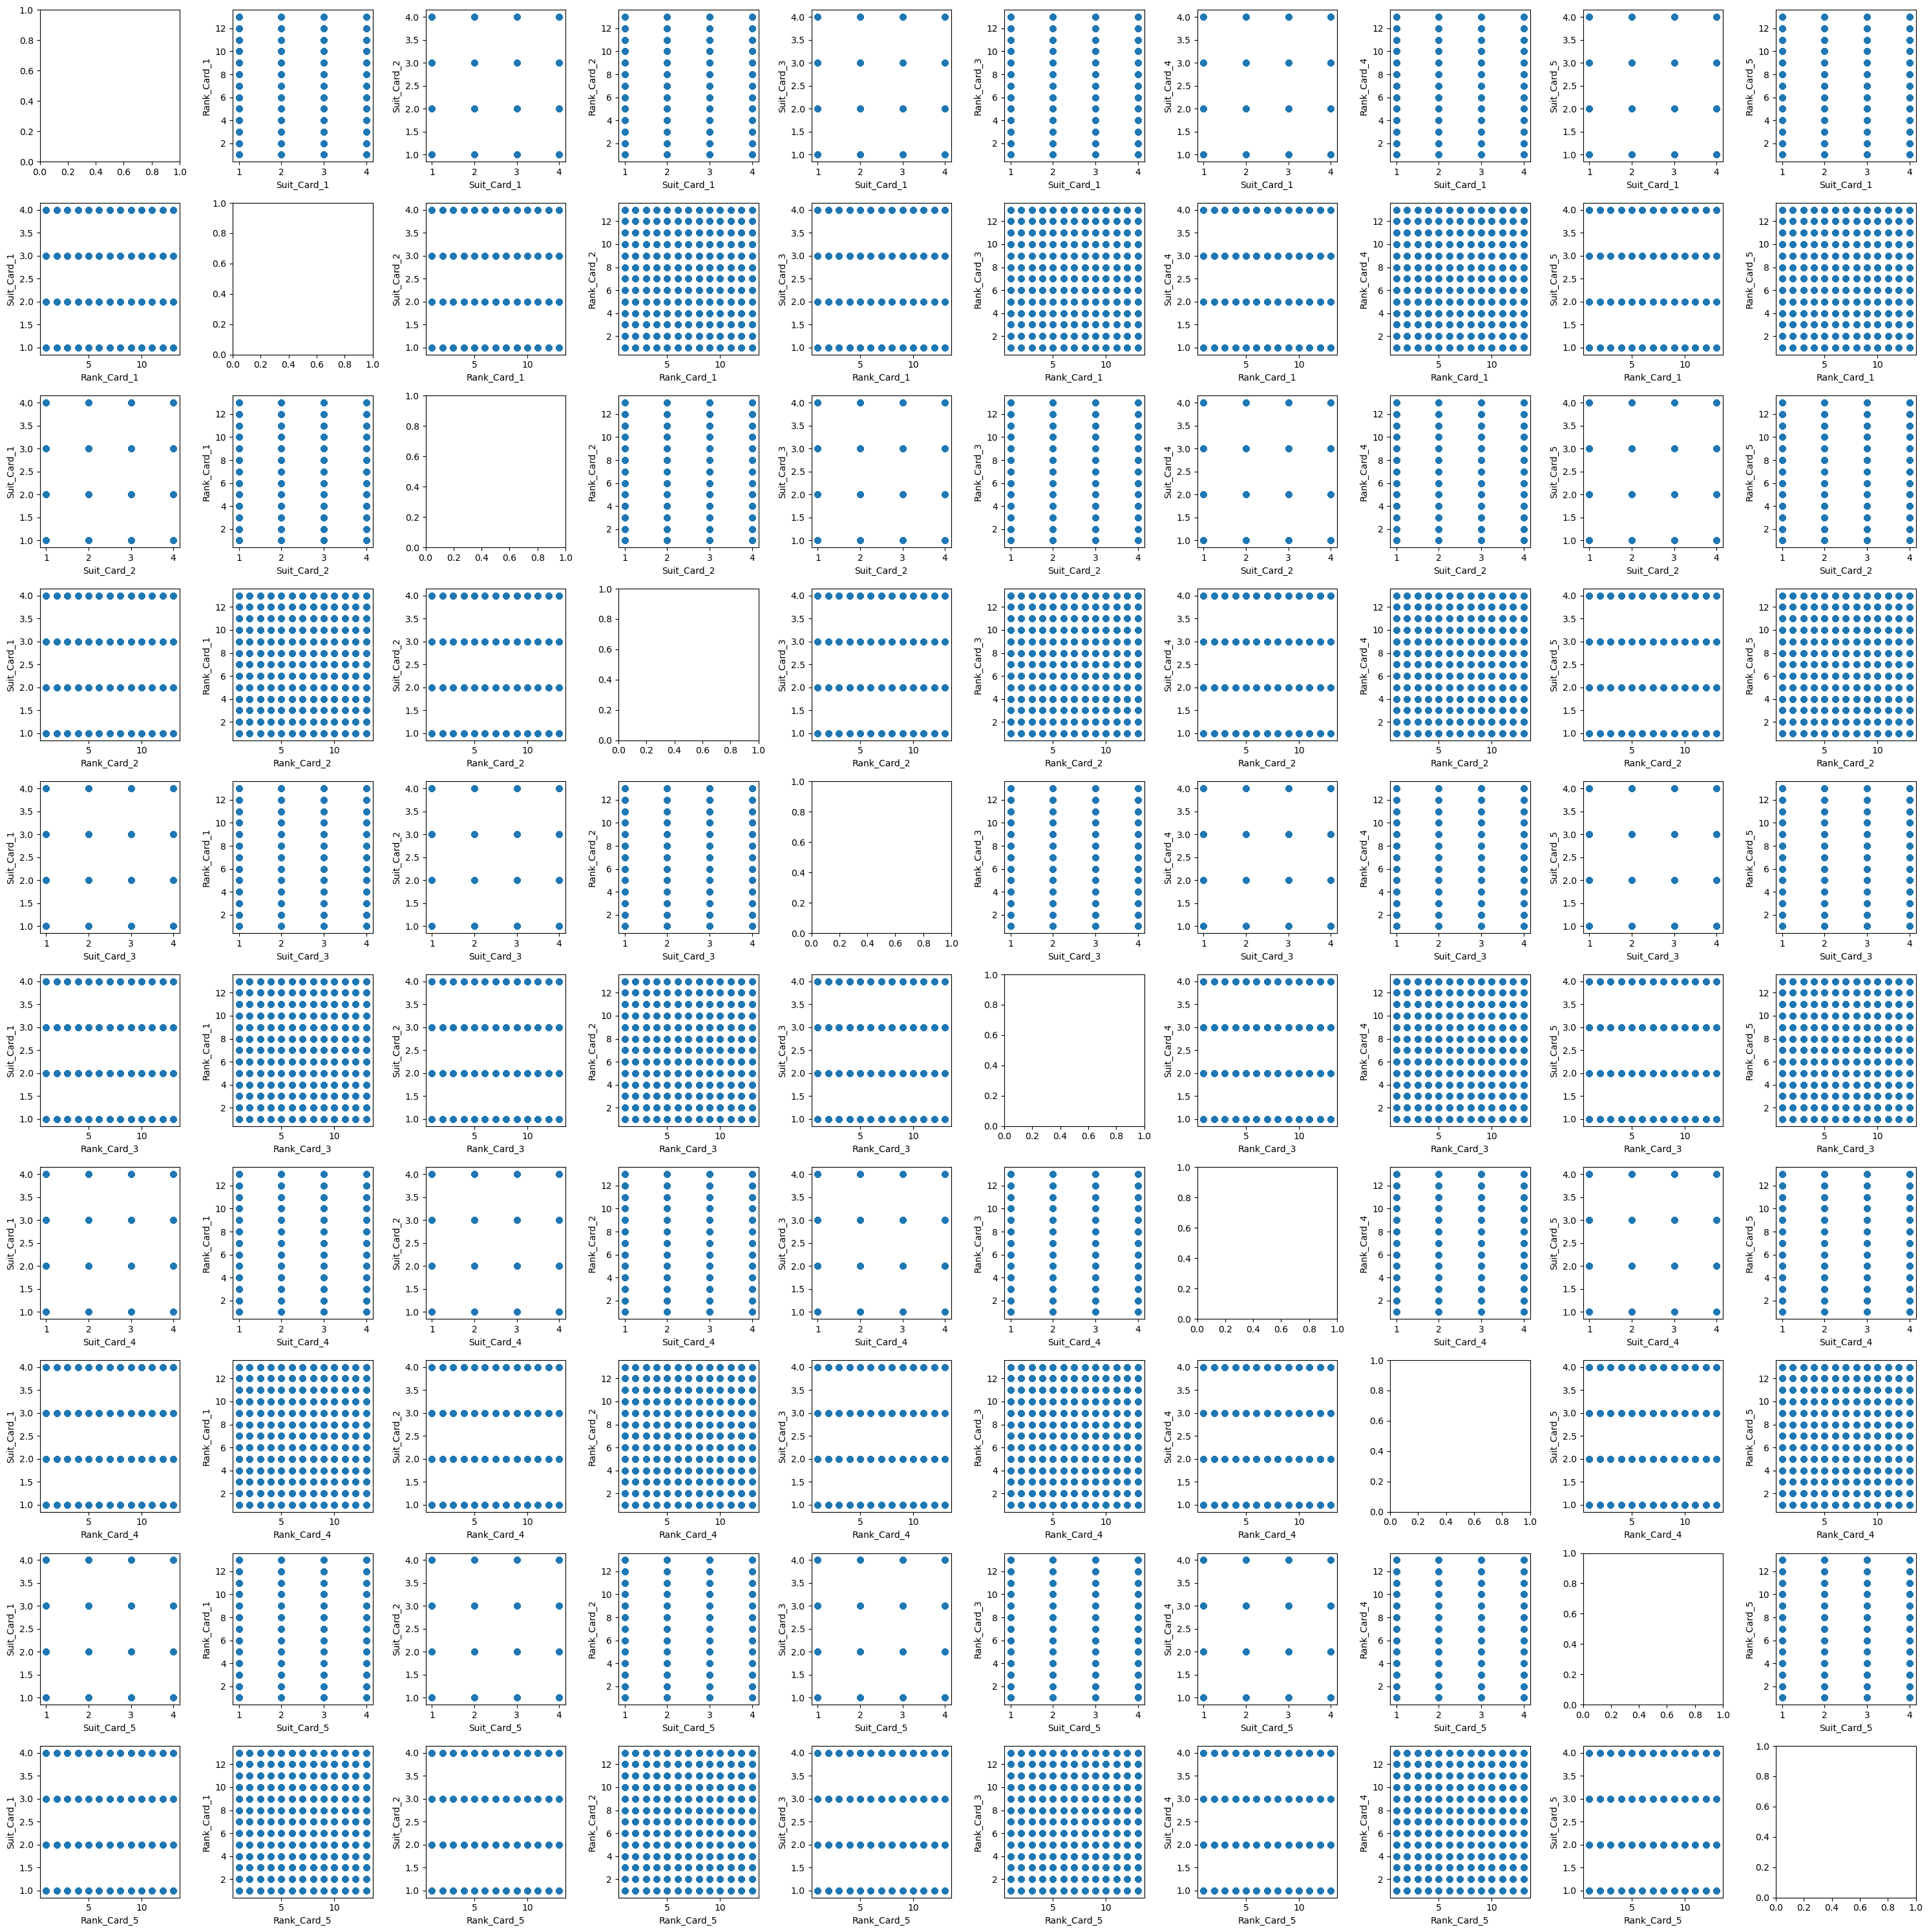

Covariances:
             Suit_Card_1  Rank_Card_1  Suit_Card_2  Rank_Card_2  Suit_Card_3  \
Suit_Card_1     1.249335    -0.006975    -0.027055     0.005797    -0.024176   
Rank_Card_1    -0.006975    14.014013    -0.002317    -0.297893    -0.000585   
Suit_Card_2    -0.027055    -0.002317     1.251369    -0.000003    -0.024297   
Rank_Card_2     0.005797    -0.297893    -0.000003    14.017943    -0.002340   
Suit_Card_3    -0.024176    -0.000585    -0.024297    -0.002340     1.250697   
Rank_Card_3     0.000679    -0.273980     0.003390    -0.293510     0.006307   
Suit_Card_4    -0.023996    -0.000065    -0.025648     0.005401    -0.024563   
Rank_Card_4     0.000136    -0.259858     0.000755    -0.287078     0.002722   
Suit_Card_5    -0.023830     0.001363    -0.025035    -0.002547    -0.026091   
Rank_Card_5     0.006972    -0.293253     0.005935    -0.241587    -0.000145   
class           0.000204     0.011116    -0.000189     0.004458     0.001094   

             Rank_Card_3  

In [10]:
# getting column names for iris_df
columns = poker_df.columns.values

# only getting the column names for the numerical attributes
num_columns = columns[:10]
print(num_columns)

# Creates figures with plots coresponing to each pair of attributes.
fig, plots = plt.subplots(len(num_columns), len(num_columns), figsize=(30, 30))

for i in range(len(num_columns)):
    for j in range(len(num_columns)):
        if i != j:
            plots[i, j].scatter(poker_df[num_columns[i]], poker_df[num_columns[j]])
            plots[i, j].set_xlabel(num_columns[i])
            plots[i, j].set_ylabel(num_columns[j])

plt.tight_layout()
plt.show()
print('Covariances:')
print(poker_df.cov(numeric_only = True))

# note: this code takes a while to execute (~10 mins)

[2.5087564974010395, 6.995241903238704, 2.497720911635346, 7.014194322271091, 2.510235905637745, 7.014154338264694, 2.495921631347461, 6.9424630147940825, 2.4973210715713714, 6.962734906037585, 0.6211515393842463]
[2.510235905637745, 7.014154338264694]


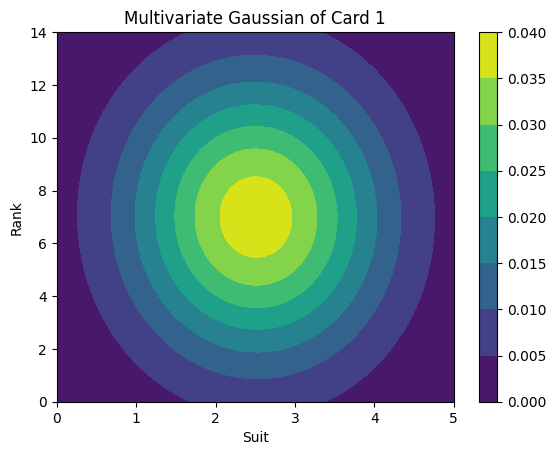

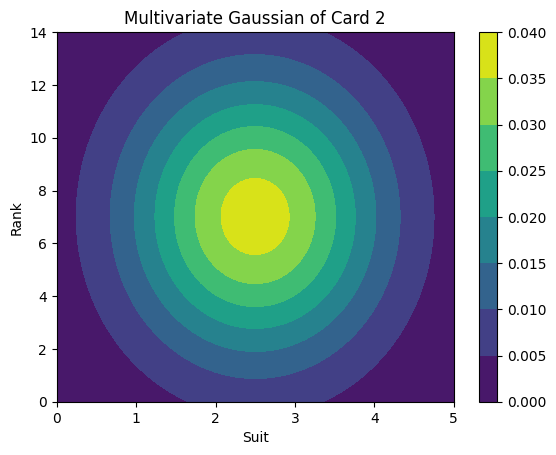

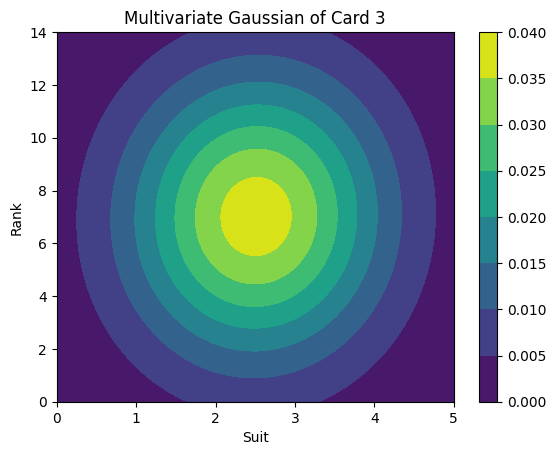

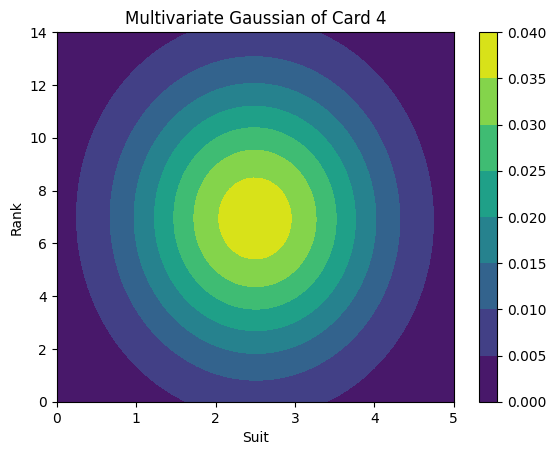

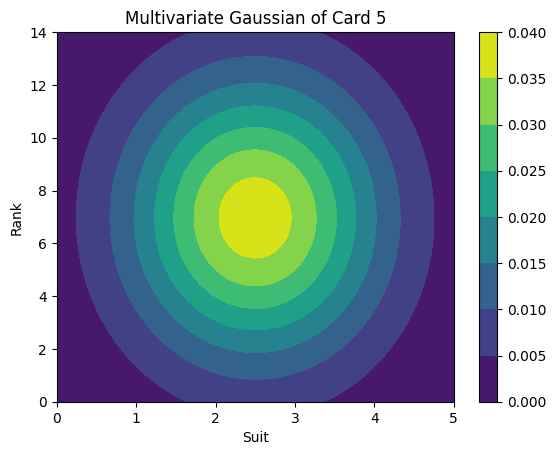

In [11]:
# Fit a multivariate Gaussian model to the data
covariance = poker_df.cov().values

mvn1 = stats.multivariate_normal(mean=mean_values[:2], cov=covariance[:2,:2])
mvn2 = stats.multivariate_normal(mean=mean_values[2:4], cov=covariance[2:4,2:4])
mvn3 = stats.multivariate_normal(mean=mean_values[4:6], cov=covariance[4:6,4:6])
mvn4 = stats.multivariate_normal(mean=mean_values[6:8], cov=covariance[6:8,6:8])
mvn5 = stats.multivariate_normal(mean=mean_values[8:10], cov=covariance[8:10,8:10])


# Create a grid of values for the two features
x, y = np.meshgrid(np.linspace(0, 5, 100), np.linspace(0, 14, 100))

# Stack the x and y values into a 2D array of data points
data_points = np.column_stack((x.ravel(), y.ravel()))

# Calculate the PDF for each data point
pdf_values1 = mvn1.pdf(data_points)
pdf_values2 = mvn2.pdf(data_points)
pdf_values3 = mvn3.pdf(data_points)
pdf_values4 = mvn4.pdf(data_points)
pdf_values5 = mvn5.pdf(data_points)

# Reshape the PDF values to match the shape of the grid
pdf_values1 = pdf_values1.reshape(100, 100)
pdf_values2 = pdf_values2.reshape(100, 100)
pdf_values3 = pdf_values3.reshape(100, 100)
pdf_values4 = pdf_values4.reshape(100, 100)
pdf_values5 = pdf_values5.reshape(100, 100)

# Create a contour plot
plt.contourf(x, y, pdf_values1, cmap='viridis')
plt.colorbar()
plt.xlabel('Suit')
plt.ylabel('Rank')
plt.title('Multivariate Gaussian of Card 1')
plt.show()

plt.contourf(x, y, pdf_values2, cmap='viridis')
plt.colorbar()
plt.xlabel('Suit')
plt.ylabel('Rank')
plt.title('Multivariate Gaussian of Card 2')
plt.show()

plt.contourf(x, y, pdf_values3, cmap='viridis')
plt.colorbar()
plt.xlabel('Suit')
plt.ylabel('Rank')
plt.title('Multivariate Gaussian of Card 3')
plt.show()

plt.contourf(x, y, pdf_values4, cmap='viridis')
plt.colorbar()
plt.xlabel('Suit')
plt.ylabel('Rank')
plt.title('Multivariate Gaussian of Card 4')
plt.show()

plt.contourf(x, y, pdf_values5, cmap='viridis')
plt.colorbar()
plt.xlabel('Suit')
plt.ylabel('Rank')
plt.title('Multivariate Gaussian of Card 5')
plt.show()

from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

Features in the poker hand dataset that seem highly correlated are the respective suit and rank features. This makes sense, as each card has a suit and a rank, which by nature makes these features correlated.

## Classification of Poker Hand Dataset
Looking at the performances of various data mining models on our dataset. In particular, we work with K-nearest Neighbors, Decision Trees, and Neural Networks. We'll do this with various different train/test splits and also test how treating different permutations of a hand as the same hand affects performance. 

In [8]:
# data preprocessing:
# sort our dataset by card so that each permutation of any given hand in the set is treated as the same data point 
vals = poker_df.values[:,:10]
cls = poker_df.values[:,10]

# pair up each card's respective rank and suit so we don't scramble them when sorting
pairs = []
for v in vals: 
    p = [(j, v[i+1]) for i, j in enumerate(v) if i % 2 == 0]
    pairs.append(p)

# sort these by suit so that permutations are considered one hand
# Sort the array first by the first value of the tuple, then by the second value
sorted_pairs = [sorted(p, key=lambda x: (x[0], x[1])) for p in pairs]

# reduce tuples back into two individual points
sorted_poker = []
for pt in sorted_pairs:
    x = [j for i in pt for j in i]
    sorted_poker.append(x)

# initialize pandas dataframe using new sorted data
sorted_poker_df = pd.DataFrame(data=sorted_poker, columns=['Suit_Card_1', 'Rank_Card_1', 'Suit_Card_2', 'Rank_Card_2', 'Suit_Card_3', 'Rank_Card_3',
                                    'Suit_Card_4', 'Rank_Card_4', 'Suit_Card_5', 'Rank_Card_5'])

sorted_poker_df['class'] = cls

In [5]:
sorted_poker_df.head()

,Suit_Card_1,Rank_Card_1,Suit_Card_2,Rank_Card_2,Suit_Card_3,Rank_Card_3,Suit_Card_4,Rank_Card_4,Suit_Card_5,Rank_Card_5,class
0,1,1,1,10,1,11,1,12,1,13,9
1,2,1,2,10,2,11,2,12,2,13,9
2,3,1,3,10,3,11,3,12,3,13,9
3,4,1,4,10,4,11,4,12,4,13,9
4,4,1,4,10,4,11,4,12,4,13,9


In [26]:
# knn without sorting
# initialize input and output features from poker dataframe
rand_poker_df = poker_df.sample(frac=1)
y = rand_poker_df['class'].values
X = rand_poker_df.drop(columns=['class'])

# use k fold cross validation to incorporate all of the classes in the dataset
kf = KFold(n_splits=5)

# initialize classifier
knn_unsorted = KNeighborsClassifier(n_neighbors=4, weights='distance')

knn_accuracies, knn_f1_scores = [], []
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # fit the data to the model and make predictions
    knn_unsorted.fit(X_train, y_train)
    y_pred = knn_unsorted.predict(X_test)

    # get the accuracy and f1 score of the model for this fold
    knn_acc = accuracy_score(y_test, y_pred)
    knn_fs = f1_score(y_test, y_pred, average='weighted')

    print(knn_acc, knn_fs)
    knn_accuracies.append(knn_acc)
    knn_f1_scores.append(knn_fs)

print(f'average accuracy for knn: {np.mean(knn_accuracies)}')
print(f'average f1 score for knn: {np.mean(knn_f1_scores)}')


0.6253646305889698 0.6114290753848147
0.626271938810353 0.612638869942709
0.6249353664842294 0.611256155705807
0.6294670295899553 0.6161427755391092
0.6269060789650832 0.6132580117074695
average accuracy for knn: 0.6265890088877182
average f1 score for knn: 0.6129449776559819


In [25]:
# knn with sorting
# initialize input and output features from the sorted poker dataframe
rand_poker_df = sorted_poker_df.sample(frac=1)
y_sorted = rand_poker_df['class'].values
X_sorted = rand_poker_df.drop(columns=['class'])

# initialize classifier
knn_sorted = KNeighborsClassifier(n_neighbors=4, weights='distance')

knn_accuracies, knn_f1_scores = [], []
for train_index, test_index in kf.split(X_sorted, y_sorted):
    X_train, X_test = X_sorted.iloc[train_index], X_sorted.iloc[test_index]
    y_train, y_test = y_sorted[train_index], y_sorted[test_index]

    # fit the data to the model and make predictions
    knn_sorted.fit(X_train, y_train)
    y_pred = knn_sorted.predict(X_test)

    # get the accuracy and f1 score of the model for this fold
    knn_acc = accuracy_score(y_test, y_pred)
    knn_fs = f1_score(y_test, y_pred, average='weighted')

    print(knn_acc, knn_fs)
    knn_accuracies.append(knn_acc)
    knn_f1_scores.append(knn_fs)

print(f'average accuracy for knn with sorted dataset: {np.mean(knn_accuracies)}')
print(f'average f1 score for knn with sorted dataset: {np.mean(knn_f1_scores)}')

0.8186603057531147 0.8138293216960483
0.8183042116662277 0.8134526337686344
0.8193724939268885 0.8145413674877487
0.8179578735817211 0.8130582315673297
0.8205041902030225 0.8155937217595742
average accuracy for knn with sorted dataset: 0.8189598150261949
average f1 score for knn with sorted dataset: 0.8140950552558671


There is a clear enhancement in performance from sorting the dataset, which is to be expected. We are reducing dimensionality by 5!, or 120, since we are eliminating permutations and there are 5! ways to order any given hand of 5 cards. 

In [17]:
# compare our results from knn with decision trees
# initialize classifier
dt = DecisionTreeClassifier(max_depth=200)

dt_accuracies, dt_f1_scores = [], []
# we'll use the arrays holding the input and output features from above
for train_index, test_index in kf.split(X_sorted, y_sorted):   
    X_train, X_test = X_sorted.iloc[train_index], X_sorted.iloc[test_index]
    y_train, y_test = y_sorted[train_index], y_sorted[test_index]

    # fit the data to the model and make predictions
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)

    # get the accuracy and f1 score of the model for this fold
    dt_acc = accuracy_score(y_test, y_pred)
    dt_fs = f1_score(y_test, y_pred, average='weighted')

    print(dt_acc, dt_fs)
    dt_accuracies.append(dt_acc)
    dt_f1_scores.append(dt_fs)

print(f'average accuracy for decision trees: {np.mean(dt_accuracies)}')
print(f'average f1 score for decision trees: {np.mean(dt_f1_scores)}')

0.7715290582530903 0.7720717417747817
0.7752363391576668 0.775688936213283
0.7731875786577692 0.773924626248935
0.7772314416444718 0.7778706602933843
0.7720949063911572 0.772634866590799
average accuracy for decision trees: 0.773855864820831
average f1 score for decision trees: 0.7744381662242367


Decision Trees doesn't work quite as well as KNN here, as our accuracies and F1 scores are lower. 

0.7854850196583448
0.7939337177198271
0.8106408717963727
0.8197237100125853
0.8180261655983844
0.8247334172349539


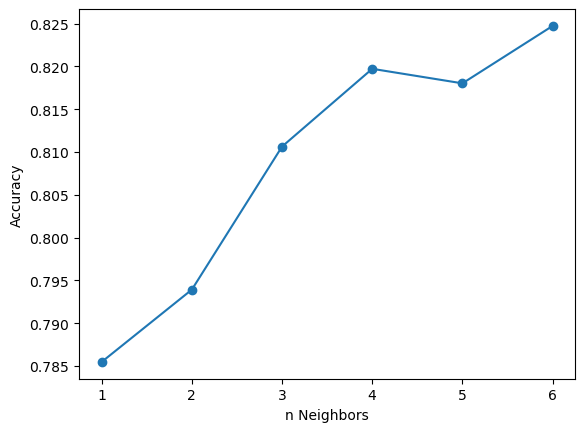

In [20]:
# testing knn with different values of k
X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(X_sorted, y_sorted, test_size=0.2, stratify=y_sorted, random_state=42)

accuracies = []
for n in range(1,7):
    # testing knn with value k = n 
    knn = KNeighborsClassifier(n_neighbors=n, weights='distance')
    # fit the data to the model and make predictions
    knn.fit(X_train_k, y_train_k)
    y_pred_k = knn.predict(X_test_k)
    # calculate accuracy
    acc = accuracy_score(y_pred_k, y_test_k)
    accuracies.append(acc)
    print(acc)
# plot the performances of the different k values
plt.plot(range(1, 7), accuracies, marker='o')
plt.xlabel('n Neighbors')
plt.ylabel('Accuracy')
plt.xticks(range(1,7))
plt.show()

In [33]:
# testing with neural networks
# test_size indicates the size of the test set. With test_size = 0.2, 20% of data is in test, 80% of data is in train.
# we'll test the performance of neural networks with different train/test splits
test_sizes = [0.95, 0.8, 0.5, 0.2]

# arrays holding the different train/test splits for each different test size
# we'll use the original, unsorted dataset here (initialized in first knn cell)
X_train, X_test, y_train, y_test = [], [], [], []
for ts in test_sizes:
    xtr, xte, ytr, yte = train_test_split(X, y, test_size=ts, stratify=y, random_state=42)
    X_train.append(xtr)
    X_test.append(xte)
    y_train.append(ytr)
    y_test.append(yte)

accuracies, f1_scores = [], []
for i in range(len(test_sizes)):
    # train and test the model on a different split for each iteration
    mlpc = MLPClassifier(max_iter=200)

    # fit the data to the model and make predictions
    mlpc.fit(X_train[i], y_train[i])
    y_pred = mlpc.predict(X_test[i])

    # calculate accuracy and f1 score
    acc = accuracy_score(y_test[i], y_pred)
    fs = f1_score(y_test[i], y_pred, average='weighted')
    print(acc, fs)
    accuracies.append(acc)
    f1_scores.append(fs)

for i in range(len(test_sizes)):
    print(f'Accuracy, F1 Score for {test_sizes[i]} test split: {accuracies[i]}, {f1_scores[i]}')
    
# note: code took 50+ minutes to run

c:\Users\Felix\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.7249322214919487 0.6965352573069165


c:\Users\Felix\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9457797972702705 0.9380872056199826


c:\Users\Felix\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9818928595818578 0.9797205140506223


c:\Users\Felix\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9988439137179149 0.9987163382395017
Accuracy, F1 Score for 0.95 test split: 0.7249322214919487, 0.6965352573069165
Accuracy, F1 Score for 0.8 test split: 0.9457797972702705, 0.9380872056199826
Accuracy, F1 Score for 0.5 test split: 0.9818928595818578, 0.9797205140506223
Accuracy, F1 Score for 0.2 test split: 0.9988439137179149, 0.9987163382395017


Though the higher test splits ran faster, they sacrificed good performance and correct predictions. The 80/20 train/test split was incredibly accurate, but took exponentionally longer than KNN and Decision Trees (the cell above took over 50 minutes to execute, while 5 folds of knn ran in about 10 minutes and 5 folds of decision trees in under two minutes).